# Project: Linear Regression
## Name: Melody Goldanloo

In [82]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests
from io import BytesIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# The Dataset

In [83]:
# URL of the Bike Sharing Dataset zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

# Fetch the zip file from the URL
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# List files in the zip
print(zip_file.namelist())

# Load the day.csv file into a DataFrame
with zip_file.open('day.csv') as file:
    df = pd.read_csv(file)
    print(df.head())

['Readme.txt', 'day.csv', 'hour.csv']
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562 

# Data Preprocessing 
Loading Data: Load the Bike Sharing dataset using Pandas. 

Data Exploration and Visualization: Produce some visualizations, statistics, etc. to gain an understanding for the dataset and what it contains.

Handling Missing Values: Check for and handle any missing values in the dataset (if any).

Encoding Categorical Variables: Convert categorical variables to numerical values using techniques like one-hot encoding (if any you see that need this).

Feature Engineering: Create new features from the date column (e.g., day of the week, month, hour) to capture temporal patterns.

Standardization: Standardize the features to have a mean of 0 and a standard deviation of 1 for consistent training. This step helps ensure that the model is not biased towards features with larger scales.

Train-Test Split: Split the dataset into training and testing sets to evaluate the model's performance on unseen data.



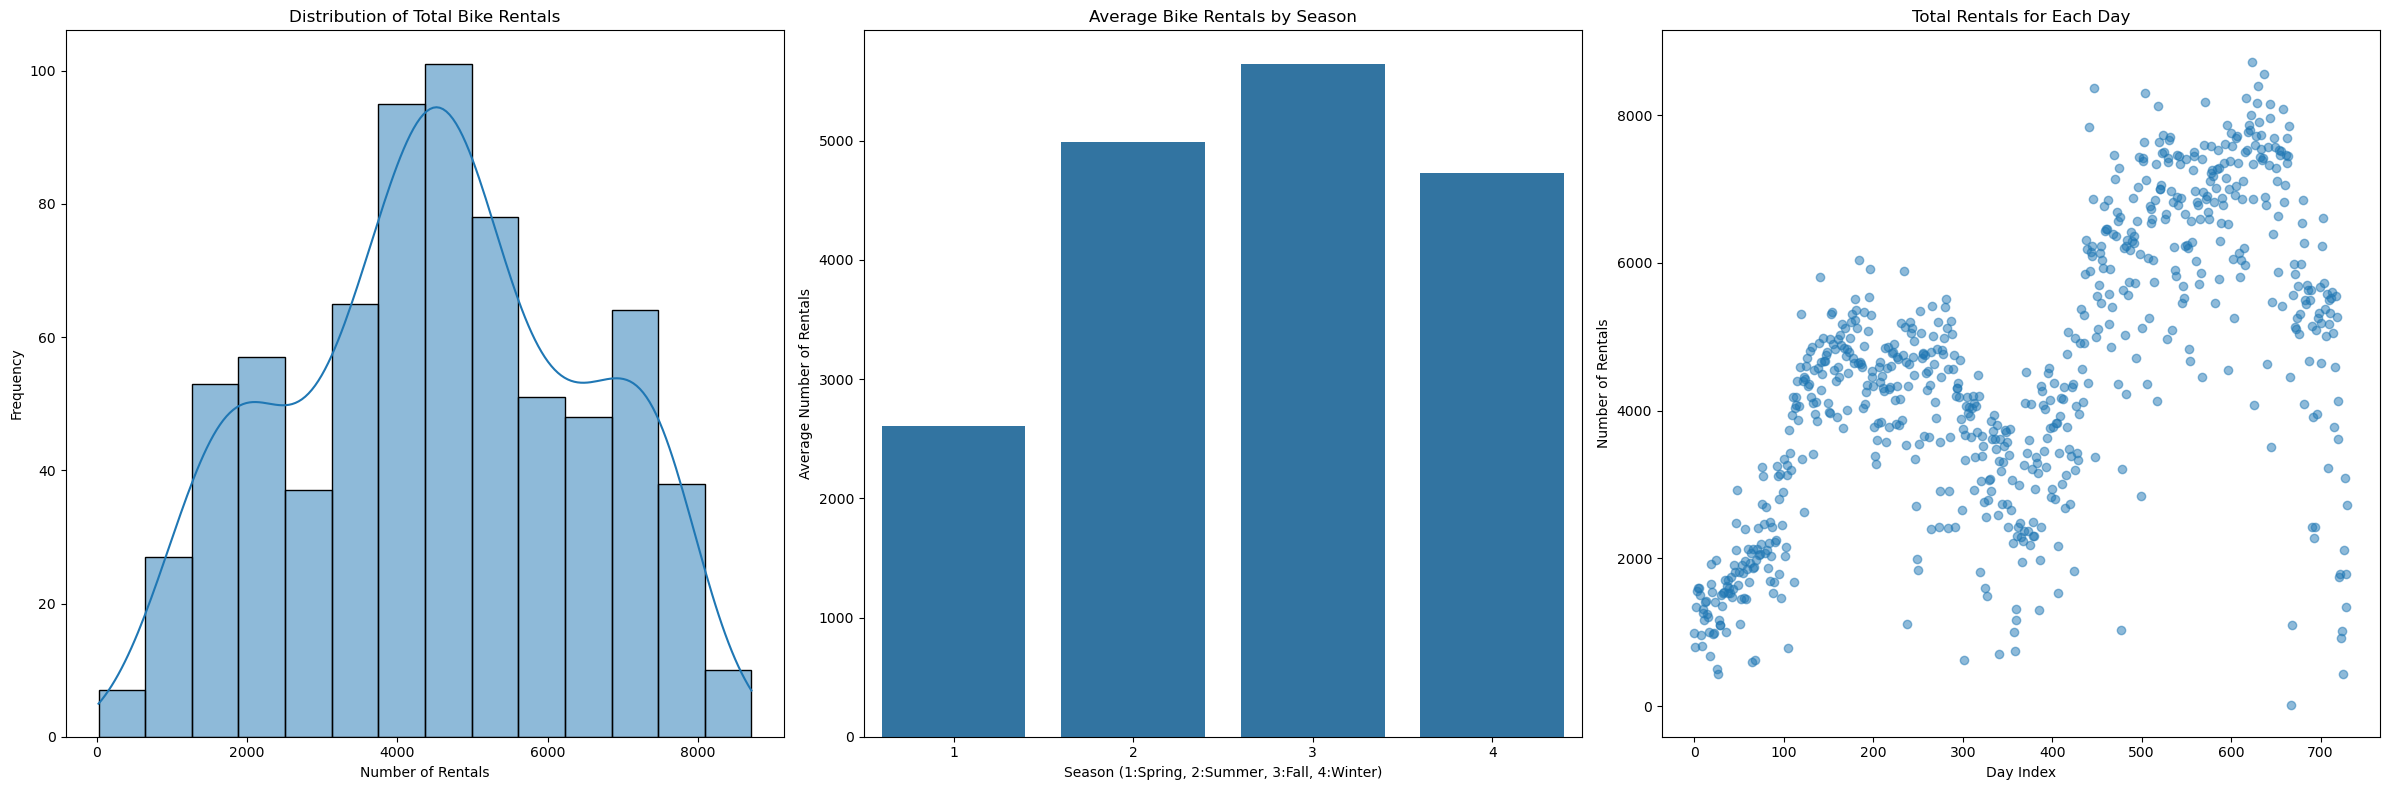

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(          instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
 25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
 50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
 75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
 max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   
 
        workingday  weathersit        temp       atemp         hum   windspeed  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
 std      0.46

In [92]:
df = pd.read_csv('day.csv')


# Data Preprocessing
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

sns.histplot(df['cnt'], kde=True, ax=ax1)
ax1.set_title('Distribution of Total Bike Rentals')
ax1.set_xlabel('Number of Rentals')
ax1.set_ylabel('Frequency')

season_avg = df.groupby('season')['cnt'].mean().reset_index()
sns.barplot(x='season', y='cnt', data=season_avg, ax=ax2)
ax2.set_title('Average Bike Rentals by Season')
ax2.set_xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
ax2.set_ylabel('Average Number of Rentals')

ax3.scatter(df.index, df['cnt'], alpha=0.5)
ax3.set_title('Total Rentals for Each Day')
ax3.set_xlabel('Day Index')
ax3.set_ylabel('Number of Rentals')

plt.tight_layout()
plt.show()


df.describe(), df.info()

In [93]:
# Checking for missing values
df.isnull().sum()
# no missing values

y = df[['cnt']]
df = df[['season','yr','mnth','holiday','weekday','workingday','weathersit', 'temp','atemp','hum', 'windspeed']]

# Encoding
encoding_cols = ['season', 'mnth','weekday','weathersit']
df[encoding_cols] = df[encoding_cols].astype('category')
df_encoded = pd.get_dummies(df, columns=encoding_cols)

# Feature Engineering
df_processed = df_encoded.copy()
#df_processed['dteday'] = pd.to_datetime(df_processed['dteday'])


#df_processed['day_of_week'] = df_processed['dteday'].dt.dayofweek
#df_processed['day_of_month'] = df_processed['dteday'].dt.day

# Drop the original 'dteday' column
#df_processed = df_processed.drop('dteday', axis=1)

# Display the first few rows to verify the changes
print(df_processed.head())
print(df_processed.info())

   yr  holiday  workingday      temp     atemp       hum  windspeed  season_1  \
0   0        0           0  0.344167  0.363625  0.805833   0.160446      True   
1   0        0           0  0.363478  0.353739  0.696087   0.248539      True   
2   0        0           1  0.196364  0.189405  0.437273   0.248309      True   
3   0        0           1  0.200000  0.212122  0.590435   0.160296      True   
4   0        0           1  0.226957  0.229270  0.436957   0.186900      True   

   season_2  season_3  ...  weekday_0  weekday_1  weekday_2  weekday_3  \
0     False     False  ...      False      False      False      False   
1     False     False  ...       True      False      False      False   
2     False     False  ...      False       True      False      False   
3     False     False  ...      False      False       True      False   
4     False     False  ...      False      False      False       True   

   weekday_4  weekday_5  weekday_6  weathersit_1  weathersit_2  weat

In [99]:
df_standardized = df_processed.copy()

scaler = StandardScaler()

X = scaler.fit_transform(df_standardized)

#print(df_standardized.head())
#print(df_standardized.info())
#print(df_standardized[['cnt_standardized']].describe())

#Train-Test Split: Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression Model
Model Initialization:

Choosing Hyperparameters: Explain key hyperparameters such as the fit_intercept and normalize.


Linear Regression Initialization: Use the LinearRegression class from Scikit-learn, specifying the chosen hyperparameters.

Model Fitting: Fit the Linear Regression model to the standardized Bike Sharing dataset.

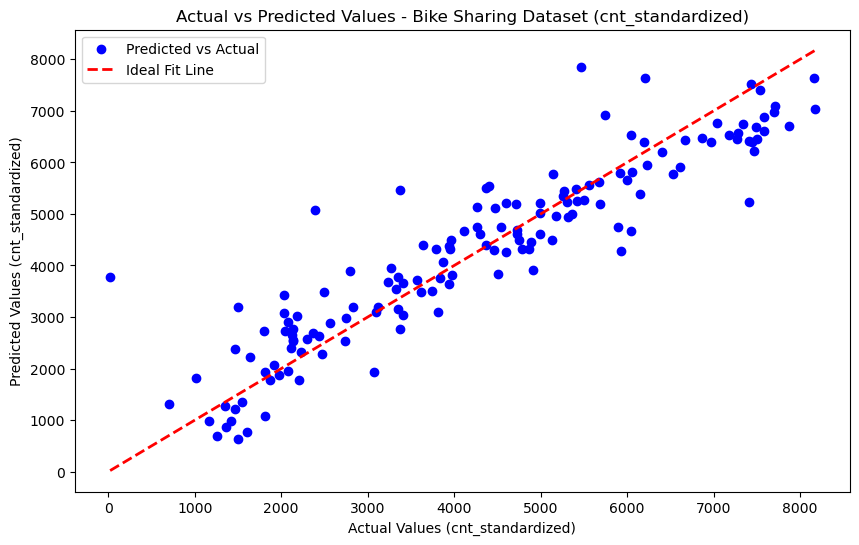

In [100]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

#Make predictions on the testing set
y_hat = model.predict(X_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel('Actual Values (cnt_standardized)')
plt.ylabel('Predicted Values (cnt_standardized)')
plt.title('Actual vs Predicted Values - Bike Sharing Dataset (cnt_standardized)')
plt.legend()
plt.show()

- `fit_intercept` determines where the intercept of the model is.
    - `fit_intercept=True` (default): allows the model to calculate the intercept
    - `fit_intercept=False`: forces the intercept to be zero

- `normalize` controls whether the input features were normalized before fitting the model.
    - `normalize=True`: scales each feature to have mean 0 and variance/std. dev. 1.
        - useful if data wasn't preprocessed and ensures model isn't biased by certain features
    - `normalize=False` (default): the features remain unchanged, so the regression can be affected by features with vastly different scale and biased.

# Evaluating the Model
Performance Metrics: Calculate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) to evaluate the model. These metrics provide insights into the model’s predictive performance and its ability to generalize.

In [103]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")


Mean Absolute Error: 581.9830117326251
Mean Squared Error: 632069.226018419
Root Mean Squared Error: 795.0278146193497
R-squared: 0.8423721245339336


Residual Analysis: Plot the residuals to understand the difference between the observed and predicted values.

### Polynomial Model

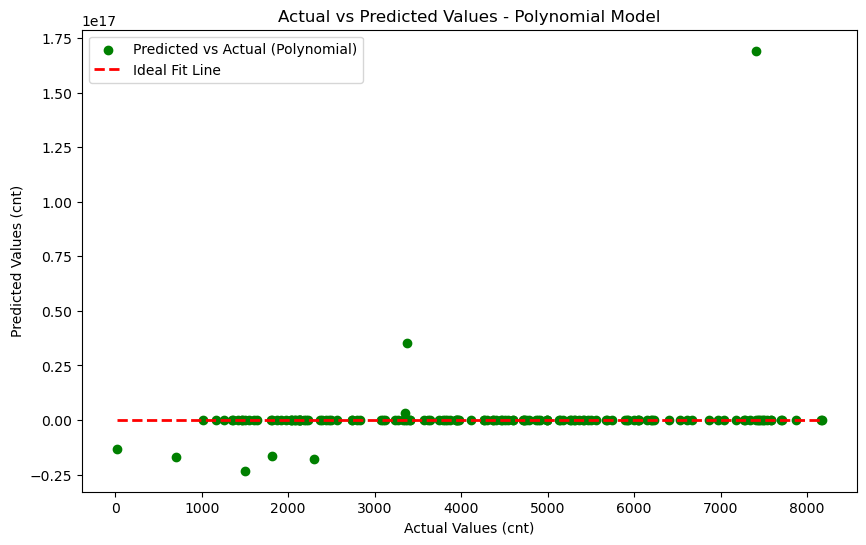

In [107]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_train_pred_poly = poly_model.predict(X_train)
y_hat_poly = poly_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_poly, color='pink', label='Predicted vs Actual (Polynomial)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel('Actual Values (cnt)')
plt.ylabel('Predicted Values (cnt)')
plt.title('Actual vs Predicted Values - Polynomial Model')
plt.legend()
plt.show()

# Tuning Model Parameters (Completed in Unit 4)

- Parameter Tuning:
- Polynomial Features and Cross-Validation: Instead of *tuning fit_intercept* and *normalize* parameters, we will use polynomial features to improve our Linear Regression model. We will systematically explore different polynomial degrees to identify the degree that results in the best performance. Additionally, we will employ cross-validation to ensure that the tuning process is robust and the results are not biased by a single train-test split.
- Specific Tuning Steps:
    - Define polynomial degrees to try: \
            `degrees = [1, 2, 3]`
    - For each degree:
        - Use PolynomialFeatures from Scikit-learn to create polynomial features.
        - Transform the training and testing data using the polynomial features.
        - Initialize and fit a LinearRegression model.
        - Perform cross-validation using cross_val_score to evaluate the model's performance.
        - Identify the degree with the best cross-validation score.
        - Refit the model with the best degree using the entire training set.

In [113]:
# Define polynomial degrees to try
degrees = [1, 2, 3, 4]
best_score = float('-inf')
best_degree = 0
best_model = None

for degree in degrees:
    # Use PolynomialFeatures from Scikit-learn to create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # Initialize and fit a LinearRegression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Perform cross-validation using cross_val_score to evaluate the model's performance
    scores = cross_val_score(model, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = scores.mean()
    
    # Identify the degree with the best cross-validation score
    if mean_score > best_score:
        best_score = mean_score
        best_degree = degree
        best_model = model

# Refit the model with the best degree using the entire training set
poly_features = PolynomialFeatures(degree=best_degree)
X_poly_train = poly_features.fit_transform(X_train)
best_model.fit(X_poly_train, y_train)

# Make predictions on the test set
X_poly_test = poly_features.transform(X_test)
y_hat_best = best_model.predict(X_poly_test)

# Evaluating the Tuned Model (Completed in Unit 4)

- Model Evaluation:
    - Performance Metrics: Calculate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) to evaluate the model. These metrics provide insights into the model’s predictive performance and its ability to generalize.
- Residual Analysis: Plot the residuals to understand the difference between the observed and predicted values.

Mean Absolute Error: 655.648741845371
Mean Squared Error: 765250.7633467517
Root Mean Squared Error: 874.7861243451176
R-squared: 0.8091587961258868


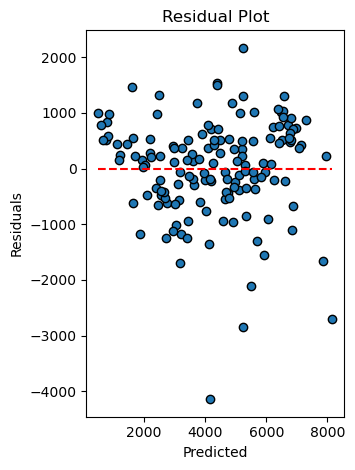

In [114]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_hat_best)  # Use y_pred from the best model predictions
mse = mean_squared_error(y_test, y_hat_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat_best)

# Print the performance metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

plt.subplot(1, 2, 2)
residuals = y_test - y_hat_best
plt.scatter(y_hat_best, residuals, edgecolors=(0, 0, 0))
plt.hlines(0, y_hat_best.min(), y_hat_best.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Visualizing Results (Completed in Units 4 and 6)
- Apply data storytelling techniques, including advanced or explanatory visualizations, to these projects. In the next section, you will find recommendations for visualizations you can use for each model.
- For each model you selected, prepare a detailed report in the form of a Jupyter Notebook File (or pdf report) summarizing the project, including the following sections:
    - Audience: Before starting you will need to choose who your presentation will be aimed at. Please provide a paragraph that details who the stakeholders are, what they may know or not know and how you will tailor your presentation to their needs. Some ideas are data scientist, students, managers, C-suite executives, general public, etc.
    - Introduction: Provide a brief overview of the problem and the chosen dataset.
    - Data Preprocessing: Describe the data preprocessing steps, including loading, data exploration and visualization, handling missing values, encoding categorical variables, feature engineering, and standardizing the data.
    - Model Architecture: Explain the model and the selected parameters.
    - Training and Evaluation: Summarize the training process, the evaluation metrics used, and the results obtained.
    - Parameter Tuning: Discuss the experiments conducted to find the optimal hyperparameters and their outcomes.
    - Visualizations (see below for recommendations for visualizations you can use for each model).
    - Conclusion: Share insights gained from the project and potential improvements for future work.

## Linear Regression
- Residual Plot: Visualize the residual plot to understand the model’s performance in detail, including how well the model captures the patterns in the data.
- Prediction Plot: Plot the predicted vs. actual values to visualize how well the model predicts the target variable.
- Learning Curves: Plot learning curves to show the model’s performance (e.g., MSE) as a function of the number of training samples. This helps in understanding how the model’s performance improves with more data.

In [ ]:
#Insert Code Here